In [1]:
# !pip install torchvision==0.9.1 torch==1.8.1
import torch
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

This is the function for displaying images.


In [2]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

<a name="Prebuilt_Dataset"><h3 id="Prebuilt_Dataset">Prebuilt Datasets</h3></a>


I will focus on the following libraries:


In [3]:
# !mamba install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets

import a prebuilt dataset, to work with several of these parameters later by placing a transform object in the argument <code>transform</code>.


In [38]:
# Import the prebuilt dataset into variable dataset
dataset = dsets.MNIST(
    root = './data',
    download = True,
    train = False,
    transform = transforms.ToTensor()
)

Each element of the dataset object contains a tuple. The first element in the dataset should be a tuple.


In [39]:
# Examine whether the elements in dataset MNIST are tuples

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. There is a dimension with only size 1, so basically, it is a rectangular tensor.<br>
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is <code>tensor(7)</code>, the image should show a hand-written 7.


Plotting the first element in the dataset:


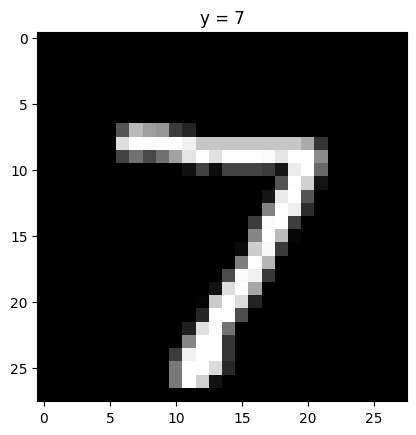

In [40]:
# Plot the first element in the dataset

show_data(dataset[0])

As we can see, it is a 7.


Plot the second sample:   


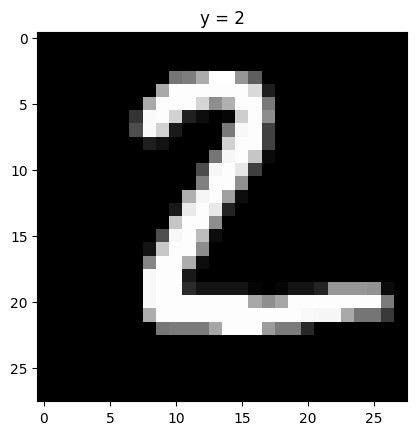

In [41]:
# Plot the second element in the dataset

show_data(dataset[1])

<a name="Torchvision"><h3 id="Torchvision"> Torchvision Transforms  </h3></a>


Apply some image transform functions on the MNIST dataset.


As an example, the images in the MNIST dataset can be cropped and converted to a tensor. Using the <code>transform.Compose</code> from previous notebooks to combine the two transform functions.


In [46]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


The image is now 20 x 20 instead of 28 x 28.


Plotting the first image again. Notice that the black space around the <b>7</b> become less apparent.


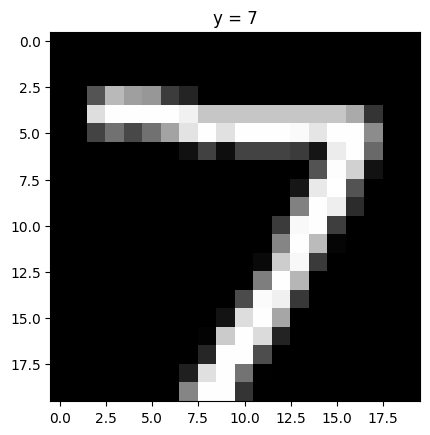

In [47]:
# Plot the first element in the dataset
show_data(dataset[0],shape = (20, 20))

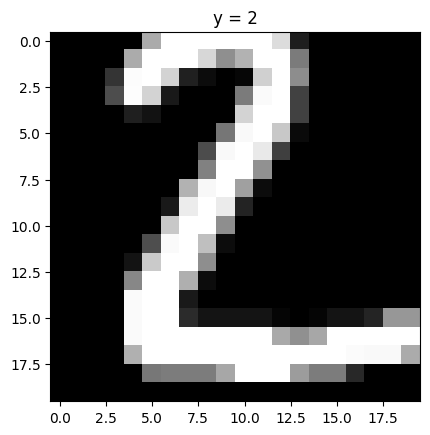

In [48]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In [49]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(50), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 50, 50])


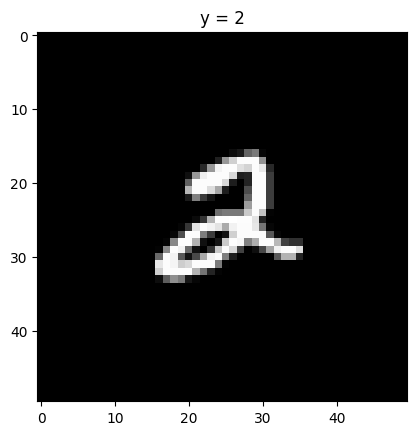

In [50]:
show_data(dataset[5], shape = (50,50))

Below, the image is horizontally flipped, and then converted to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


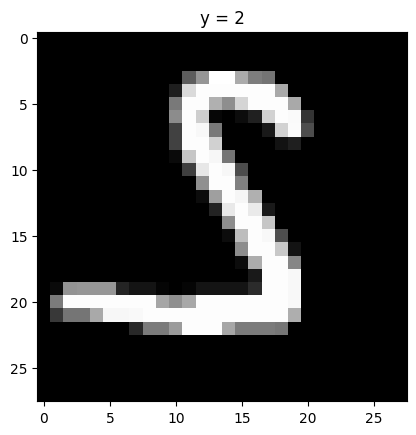

In [52]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

Using the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image.


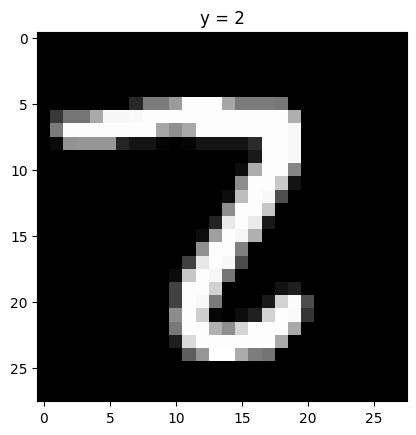

In [58]:
# Combine vertical flip, horizontal flip and convert to tensor as a compose. Apply the compose on image. Then plot the image

my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1),transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = my_data_transform)
show_data(dataset[1])